In [168]:
%matplotlib inline

import matplotlib.pyplot as pyplot
from collections import defaultdict
# import copy

import numpy as np
# from scipy import interpolate

import geopandas as gpd
import shapely.geometry as geom
import shapely.affinity as affine
# import shapely.ops

from weavingspace import Topology
from weavingspace import Symmetry
from weavingspace import TileShape
from weavingspace import TileUnit
from weavingspace import WeaveUnit
from weavingspace import Symmetries
from weavingspace import tiling_utils

In [169]:
square = tiling_utils.get_regular_polygon(200, 4)
L_shape = square.union(
  affine.translate(square, 200, 0)).union(
  affine.translate(square, 0, 200))
# L_shape = tiling_utils.get_clean_polygon(L_shape)

tile = TileUnit()
tile.base_shape = TileShape.HEXAGON
tile.tiles = gpd.GeoDataFrame(
  {"tile_id": list("abcd")},
  geometry = gpd.GeoSeries([affine.translate(L_shape, -100, 200), 
                            affine.translate(L_shape, 100, -200),
                            affine.translate(L_shape, -100, -400), 
                            affine.translate(L_shape, -300, 0)]))
tile.setup_regularised_prototile_from_tiles()
tile.prototile = gpd.GeoDataFrame(
  geometry = gpd.GeoSeries(
    geom.Polygon([(100, -450), (-300, -350), (-300, 350),
                  (-100, 450), (300, 350), (300, -350)])))
tile.vectors = tile.get_vectors()
# tile = tile.transform_rotate(90)

/Users/osullid3/miniconda3/envs/weaving/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/osullid3/miniconda3/envs/weaving/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/osullid3/miniconda3/envs/weaving/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/osullid3/miniconda3/envs/weaving/lib/python3.12/site-packages/shapely/set_operations.py:419: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/Users/osullid3/miniconda3/envs/weaving/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwa

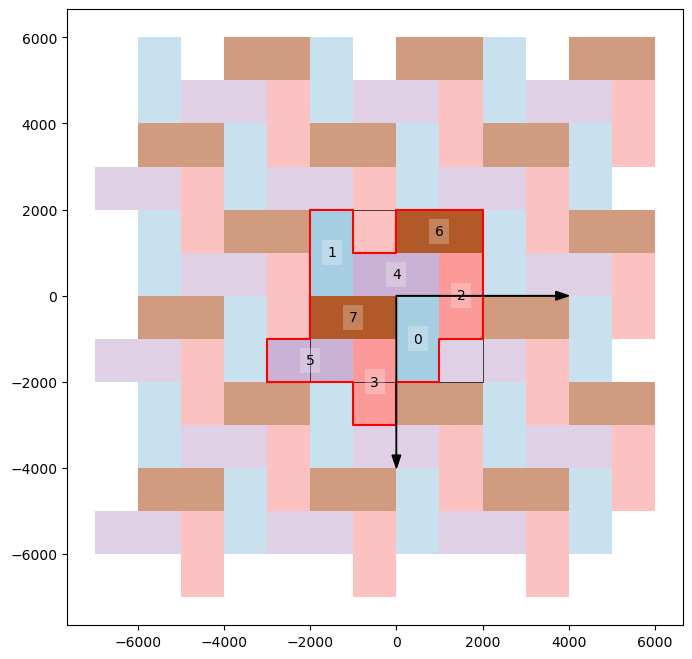

In [177]:
tile = TileUnit(tiling_type = "archimedean", code = "3.3.4.3.4")
tile = TileUnit(tiling_type = "hex-dissection", n = 9, offset = 1)
tile = TileUnit(tiling_type = "hex-slice", n = 3, offset = 1)
tile = TileUnit(tiling_type = "archimedean", code = "3.4.6.4")
tile = TileUnit(tiling_type = "archimedean", code = "3.12.12")
tile = TileUnit(tiling_type = "archimedean", code = "4.8.8")
tile = TileUnit(tiling_type = "cairo", n = 3)
tile = TileUnit(tiling_type = "hex-colouring", n = 3).transform_skew(20).transform_scale(1.2)
tile = WeaveUnit(weave_type = "plain", n = 2, strands = "a|d")
tile = WeaveUnit(weave_type = "basket", n = 3, strands = "abc|def")
tile = WeaveUnit(weave_type = "twill", n = 2, strands = "ab|de")
ax = tile.plot(r = 1, show_reg_prototile = True, show_prototile = True, cmap = "Paired", show_ids = "id", r_alpha = 0.6, show_vectors = True)

In [178]:
topo = Topology(tile)

/Users/osullid3/miniconda3/envs/weaving/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


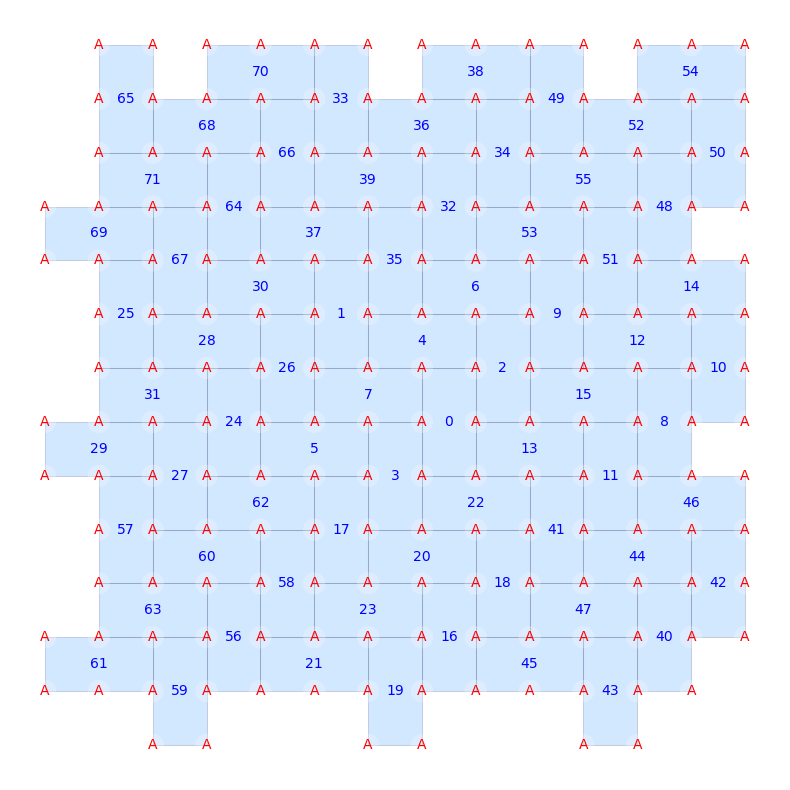

In [179]:
ax = topo.plot(
  show_original_tiles = True,
  show_tile_vertex_labels = False,
  show_tile_edge_labels = False,
  show_tile_centres = True,
  show_vertex_labels = True,
  show_vertex_ids = True,
  show_edge_labels = False,
  show_edges = False,
  offset_edges = False,
  show_dual_tiles = False
)
# gpd.GeoSeries(symmetry_centres).plot(ax = ax)

In [180]:
set([v.equivalence_class for v in topo.points.values()])

{0}

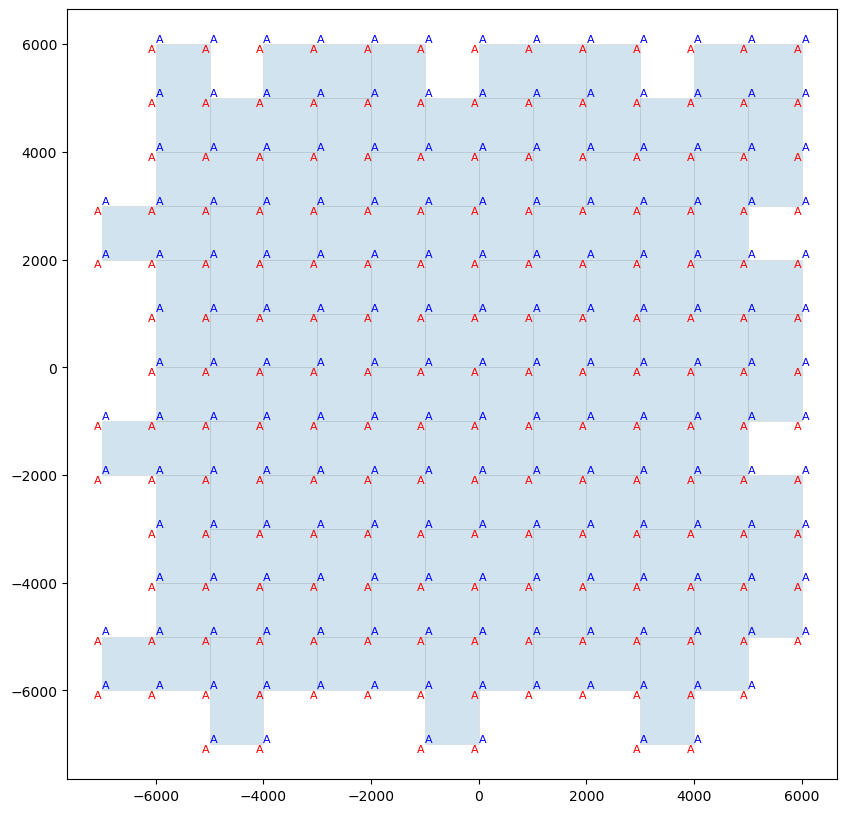

In [181]:
LETTERS = "ABCEDEF"

ax = gpd.GeoSeries([t.shape for t in topo.tiles]).plot(ec = "grey", lw = .5, figsize = (10, 10), alpha = 0.2)
gdf = gpd.GeoDataFrame(
  data = {"eclass": [v.equivalence_class for v in topo.points.values()],
          "label": [v.label for v in topo.points.values()],
          "base_id": [v.base_ID for v in topo.points.values()]},
  geometry = gpd.GeoSeries([v.point for v in topo.points.values()])
)

for c, l, b, pt in zip(gdf.eclass, gdf.label, gdf.base_id, gdf.geometry):
  ax.annotate(LETTERS[c], xy = (pt.x, pt.y), ha = "left", va = "bottom", 
              color = "b", fontsize = 8)
  ax.annotate(l, xy = (pt.x, pt.y), ha = "right", va = "top",
              color = "r", fontsize = 8)
  # ax.annotate(b, xy = (pt.x - 25, pt.y - 25), ha = "right", va = "top",
  #             color = "k", fontsize = 8)


(-7650.0, 6650.0, -7650.0, 6650.0)

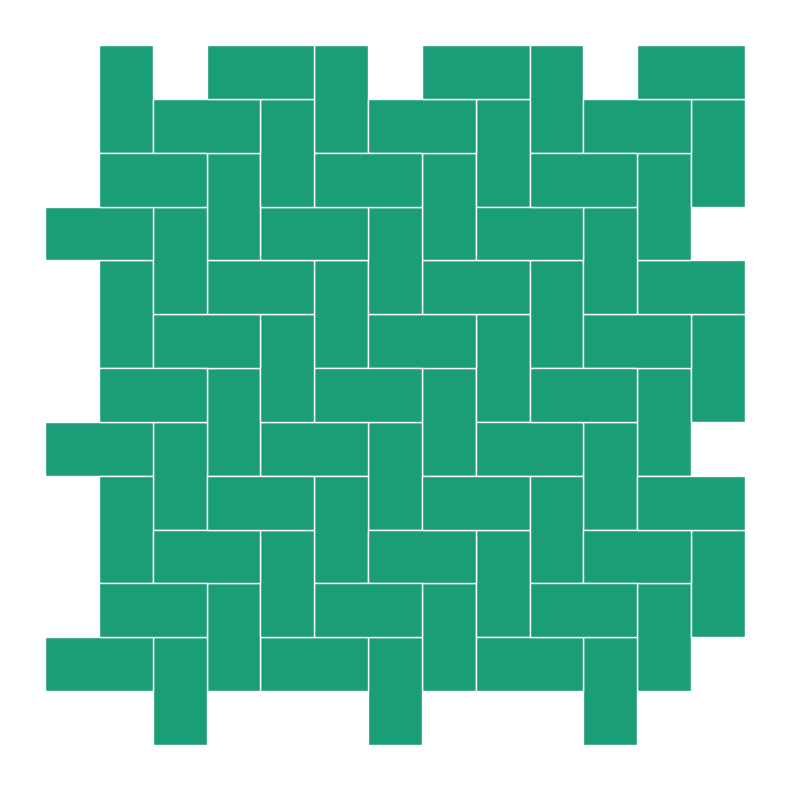

In [182]:
gdf = gpd.GeoDataFrame(
  data = {"equivalence_class": [t.group for t in topo.tiles]},
  geometry = gpd.GeoSeries([t.shape for t in topo.tiles])
)
gdf.plot(column = "equivalence_class", figsize = (10, 10), ec = "w", cmap = "Dark2")
pyplot.axis("off")

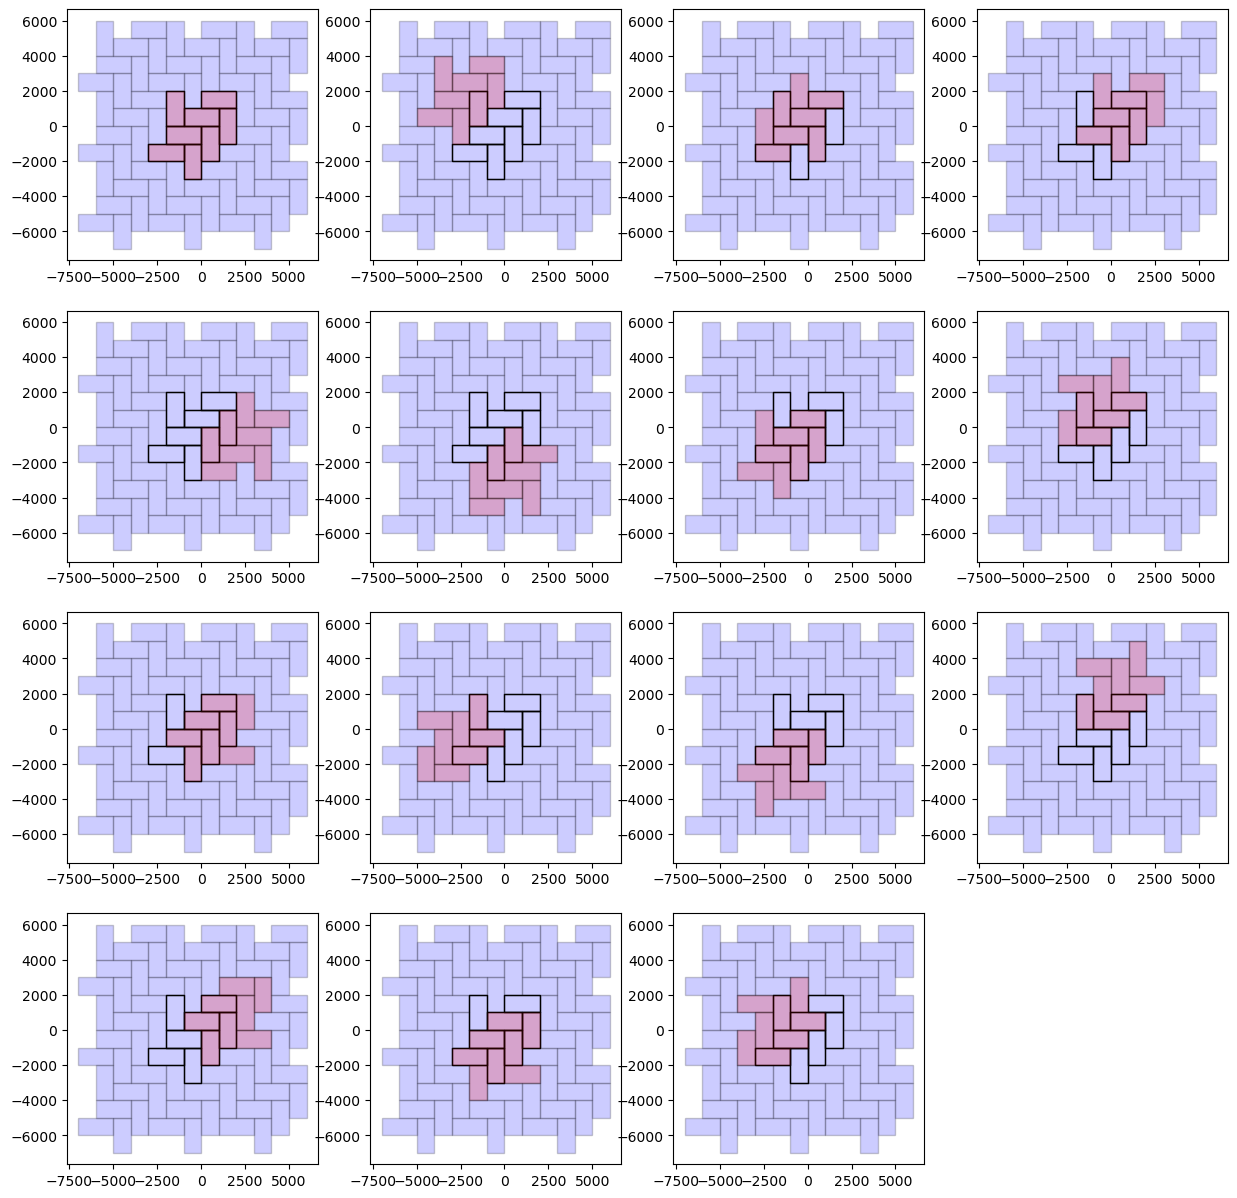

In [183]:
n = len(topo.tile_matching_transforms)
nr = int(np.ceil(np.sqrt(n)))
nc = int(np.ceil(n / nr))
gs = gpd.GeoSeries([t.shape for t in topo.tiles])
gsb = gs[:topo.n_tiles]
fig = pyplot.figure(figsize = (15, 15 * nr / nc))
for i, tr in enumerate(topo.tile_matching_transforms.values()):
  ax = fig.add_subplot(nr, nc, i + 1)
  gs.plot(ax = ax, fc = "b", alpha = 0.2, ec = "k")
  gsb.plot(ax = ax, fc = "#00000000", ec = "k")
  gsm = gpd.GeoSeries([affine.affine_transform(g, tr) for g in gsb])
  gsm.plot(ax = ax, fc = "r", alpha = 0.2, lw =1, ec = "k")